# Leather Defect Detection

In [29]:
# stitches vs  holes model:siz

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator

# model modules

from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten , Activation , Conv2D , MaxPooling2D , BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam , SGD , Adagrad , Adadelta , RMSprop

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [30]:
DIR = "D:\Python Projects\Leather defect detection\Leather Detection\Dataset"
x =[]
y =[]
img_size = 480
not_leather = "D:/Python Projects/Leather defect detection/Leather Detection/Dataset/not_a_leather"
leather = "D:/Python Projects/Leather defect detection/Leather Detection/Dataset/Output_dataset"

In [31]:
def assign_type(img , leather_identity):
    return leather_identity

def make_training_data(leather_identity , DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR , img)
        label = assign_type(img , leather_identity)
        img = cv2.imread(path , cv2.IMREAD_COLOR)
        img = cv2.resize(img , (img_size , img_size))

        x.append(img)
        y.append(str(label))

In [32]:
# making the dataset

make_training_data("leather",leather)
print(len(x))

make_training_data("not a leather" ,not_leather)
print(len(x))

100%|██████████| 2916/2916 [00:05<00:00, 526.58it/s]


2916


100%|██████████| 2349/2349 [00:14<00:00, 166.55it/s]

5265


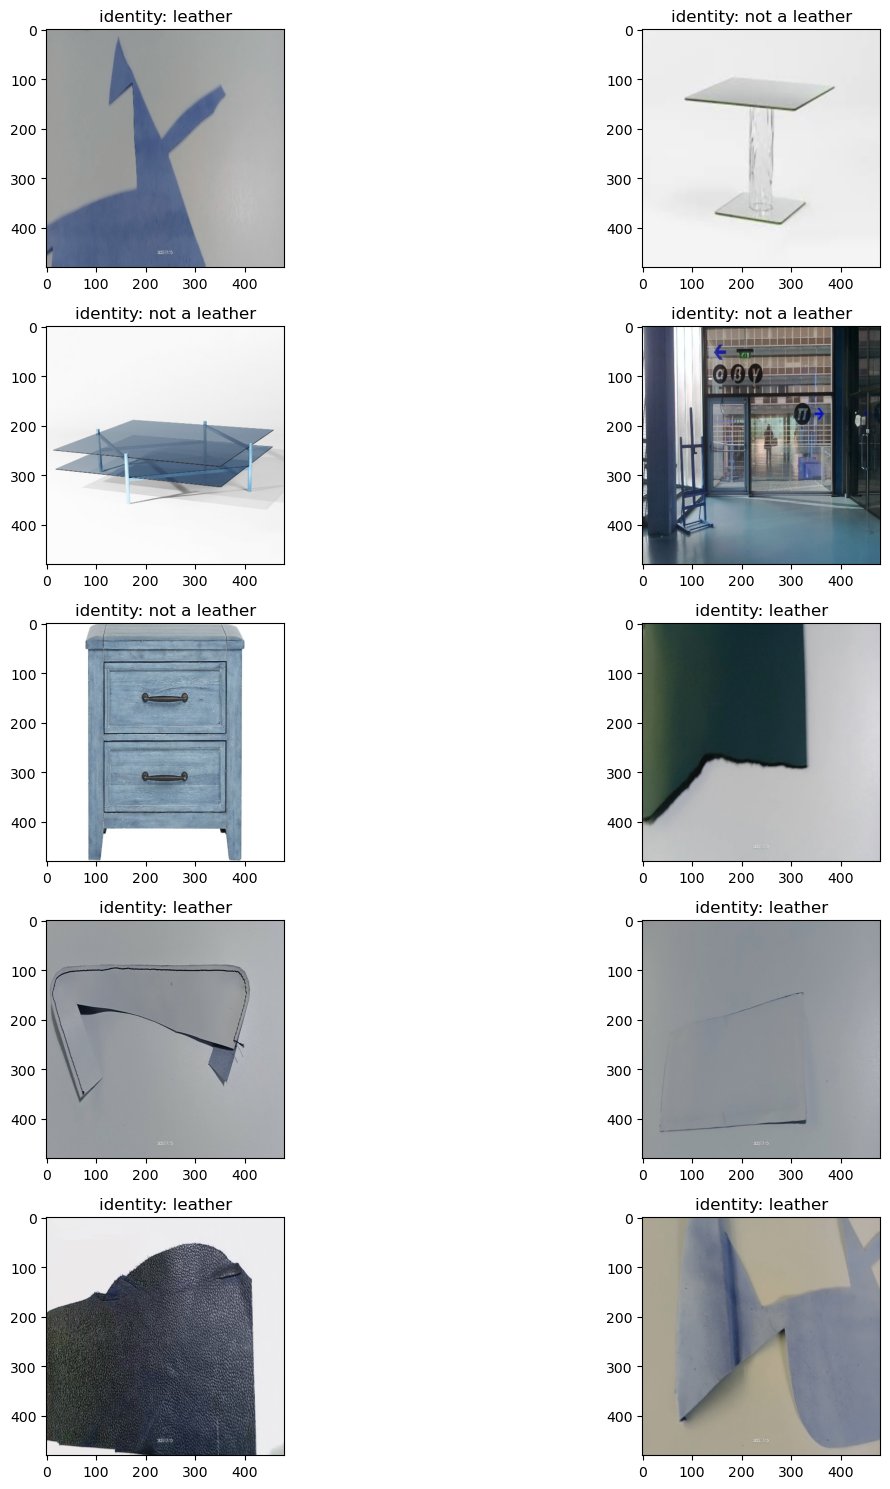

In [33]:
fig , ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l = rn.randint(0 , len(y))
        ax[i , j].imshow(x[l])
        ax[i , j].set_title("identity: "+ y[l] )
        
plt.tight_layout()

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y,2)

In [9]:
x = np.array(x)
x = x/255

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.9 , random_state = 42)

In [11]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [12]:
# shape info

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(526, 480, 480, 3)
(4739, 480, 480, 3)
(526, 2)
(4739, 2)


In [13]:
# classifier creation

classifier1 = Sequential()

# convolution and pooling

classifier1.add(Conv2D(32,(5,5),activation='relu' , padding ='same' , input_shape = (480,480,3)))
classifier1.add(MaxPooling2D(pool_size = (2,2)))

classifier1.add(Conv2D(64,(3,3),activation='relu' , padding ='same'))
classifier1.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

classifier1.add(Conv2D(96,(3,3),activation='relu' , padding ='same'))
classifier1.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

classifier1.add(Conv2D(108,(3,3),activation='relu' , padding ='same'))
classifier1.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

classifier1.add(Flatten())

# neural network

classifier1.add(Dense(512,activation = 'relu'))
classifier1.add(Dense(256 , activation = 'relu'))
classifier1.add(Dense(128,activation = 'relu'))
classifier1.add(Dense(2,activation = 'softmax'))

print(classifier1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 480, 480, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 240, 240, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 120, 120, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 96)      55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 60, 60, 96)        0

In [34]:
batch_size = 128
epochs = 20

from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor = 'val_acc' , patience = 3 , verbose = 1 , factor = 0.1)

In [35]:
datagen = ImageDataGenerator(
featurewise_center = False,
samplewise_center = False,
featurewise_std_normalization = False,
samplewise_std_normalization = False,
zca_whitening = False,
rotation_range = 10,
zoom_range = 0.1,
width_shift_range = 0.2,
height_shift_range = 0.2,
horizontal_flip = True,
vertical_flip = False)

In [36]:
classifier1.compile(optimizer = Adam(learning_rate = 0.001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [37]:
y = np.array(y)

In [38]:
n_train = x_train.shape[0]
steps_per_epoch = n_train // batch_size

In [39]:
validation_data = datagen.flow(x_test, y_test)

In [40]:
history = classifier1.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=validation_data,
    verbose=1,
    callbacks=[red_lr]
)

Epoch 1/20
5/5 [==============================] - 222s 46s/step - loss: 0.7461 - accuracy: 0.7548 - val_loss: 0.6207 - val_accuracy: 0.5438 - lr: 0.0010
Epoch 2/20
5/5 [==============================] - 183s 41s/step - loss: 0.6034 - accuracy: 0.5760 - val_loss: 0.5605 - val_accuracy: 0.8303 - lr: 0.0010
Epoch 3/20
5/5 [==============================] - 181s 42s/step - loss: 0.6182 - accuracy: 0.7281 - val_loss: 0.5377 - val_accuracy: 0.7567 - lr: 0.0010
Epoch 4/20
5/5 [==============================] - 182s 42s/step - loss: 0.6133 - accuracy: 0.6578 - val_loss: 0.5322 - val_accuracy: 0.7831 - lr: 0.0010
Epoch 5/20
5/5 [==============================] - 180s 41s/step - loss: 0.5098 - accuracy: 0.7814 - val_loss: 0.4984 - val_accuracy: 0.7892 - lr: 0.0010
Epoch 6/20
5/5 [==============================] - 183s 42s/step - loss: 0.4805 - accuracy: 0.7966 - val_loss: 0.4325 - val_accuracy: 0.8510 - lr: 0.0010
Epoch 7/20
5/5 [==============================] - 184s 42s/step - loss: 0.4615 - a

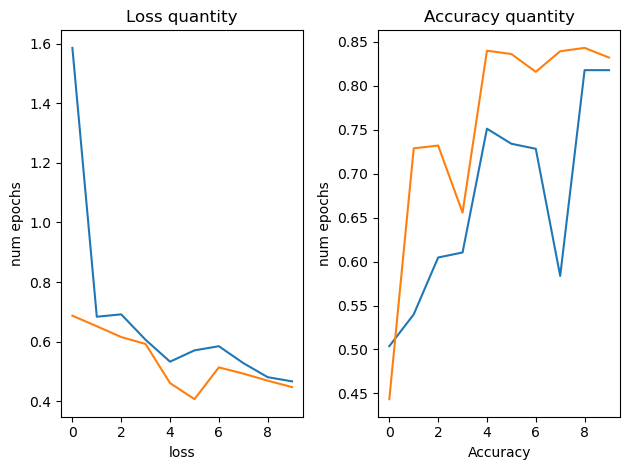

In [27]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('loss')
plt.ylabel('num epochs')
plt.title('Loss quantity')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('num epochs')
plt.title('Accuracy quantity')

plt.tight_layout()
plt.show()

In [41]:
image_width = 480
image_height = 480

In [42]:
def preprocess_image(image):
    image = cv2.resize(image, (image_width, image_height))
    image = image.astype('float32') / 255.0
    return image

def predict_class(image, model):
    preprocessed_image = preprocess_image(image)
    input_image = np.expand_dims(preprocessed_image, axis=0)
    probabilities = model.predict(input_image)[0]
    predicted_class_index = np.argmax(probabilities)
    max_probability = np.max(probabilities)
    return predicted_class_index, max_probability

In [47]:
model = classifier1

camera = cv2.VideoCapture(0)

while True:
     ret, frame = camera.read()
     cv2.imshow('Camera', frame)
     if cv2.waitKey(1) & 0xFF == ord('q'):
        break
     predicted_class_index, max_probability = predict_class(frame, model)
     class_labels = ["Leather","not a Leather"]
     predicted_class_label = class_labels[predicted_class_index]
     print(f'Predicted Class: {predicted_class_label}, Probability: {max_probability:.2%}')
    
camera.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 203ms/step
Predicted Class: Leather, Probability: 94.62%
1/1 [==============================] - 0s 43ms/step
Predicted Class: Leather, Probability: 94.55%
1/1 [==============================] - 0s 44ms/step
Predicted Class: Leather, Probability: 94.55%
1/1 [==============================] - 0s 45ms/step
Predicted Class: Leather, Probability: 94.52%
1/1 [==============================] - 0s 44ms/step
Predicted Class: Leather, Probability: 94.53%
1/1 [==============================] - 0s 43ms/step
Predicted Class: Leather, Probability: 94.52%
1/1 [==============================] - 0s 43ms/step
Predicted Class: Leather, Probability: 94.54%
1/1 [==============================] - 0s 42ms/step
Predicted Class: Leather, Probability: 94.53%
1/1 [==============================] - 0s 43ms/step
Predicted Class: Leather, Probability: 94.53%
1/1 [==============================] - 0s 42ms/step
Predicted Class: Leather, Probability: 94.55%
1/1 [==============